In [1]:
import pm4py
import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
pandas.set_option('display.max_columns', 100)

In [2]:
file_path = '../../../data/BPI Challenge 2017.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [3]:
event_log

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [4]:
pandas.set_option('display.max_rows', 100)
event_log.groupby(['concept:name', 'lifecycle:transition']).nunique()

,,Action,org:resource,EventOrigin,EventID,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
concept:name,lifecycle:transition,,,,,,,,,,,,,,,,,
A_Accepted,complete,1,113,1,31509,31509,14,2,31509,701,0,0,0,0,0,0,0,0
A_Cancelled,complete,1,108,1,10431,10431,14,2,10431,393,0,0,0,0,0,0,0,0
A_Complete,complete,1,113,1,31362,31362,14,2,31362,699,0,0,0,0,0,0,0,0
A_Concept,complete,1,114,1,31509,31509,14,2,31509,701,0,0,0,0,0,0,0,0
A_Create Application,complete,1,111,1,31509,31509,14,2,31509,701,0,0,0,0,0,0,0,0
A_Denied,complete,1,99,1,3753,3753,13,2,3752,238,0,0,0,0,0,0,0,0
A_Incomplete,complete,1,101,1,23055,23055,13,2,15003,515,0,0,0,0,0,0,0,0
A_Pending,complete,1,40,1,17228,17227,13,2,17228,520,0,0,0,0,0,0,0,0
A_Submitted,complete,1,1,1,20423,20423,14,1,20423,536,0,0,0,0,0,0,0,0


In [5]:
#event_log[(event_log['concept:name'] == 'W_Complete application')][:99999].to_csv('test.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
waiting_time_event_log = TransformEventLog.start_end_event_log_mult(event_log,
                                                                    start_name_1='schedule',
                                                                    complete_name_1 = 'start',
                                                                    complete_name_2 = 'withdraw',
                                                                    complete_name_3 = 'manualskip',
                                                                   start_name_gen='_schedule',
                                                                   complete_name_gen='_start')

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration'] = start_end_event_log[timestamp_name + complete_name_gen] - start_end_event_log[timestamp_name + start_name_gen]
/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_en

In [7]:
waiting_time_event_log.groupby(['lifecycle:transition_schedule', 'lifecycle:transition_start']).count()

Action_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                    
schedule                      start                                127210   
                              withdraw                              21844   

                                                          org:resource_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                          
schedule                      start                                      127210   
                              withdraw                                    21844   

                                                          concept:name  \
lifecycle:transition_schedule lifecycle:transition_start                 
schedule                      start                             127210   
                              withdraw                           21844   

                                                          EventOrigin_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                         
schedule                      start                                     127210   
                              withdraw                                   21844   

                                                          EventID_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                     
schedule                      start                                 127210   
                              withdraw                               21844   

                                                          time:timestamp_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                            
schedule                      start                                        127210   
                              withdraw                                      21844   

                                                          case:LoanGoal_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                           
schedule                      start                                       127210   
                              withdraw                                     21844   

                                                          case:ApplicationType_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                                  
schedule                      start                                              127210   
                              withdraw                                            21844   

                                                          case:concept:name  \
lifecycle:transition_schedule lifecycle:transition_start                      
schedule                      start                                  127210   
                              withdraw                                21844   

                                                          case:RequestedAmount_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                                  
schedule                      start                                              127210   
                              withdraw                                            21844   

                                                          FirstWithdrawalAmount_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                                   
schedule                      start                                                    0   
                              withdraw                                                 0   

                                                          NumberOfTerms_schedule  \
lifecycle:transition_schedule lifecycle:transition_start                           
schedule                      start                                            0   
                              withdraw                                         0   

                                              

In [8]:
(waiting_time_event_log['duration_seconds']).describe()

count    1.490540e+05
mean     3.566162e+04
std      2.103109e+05
min      1.000000e-03
25%      2.000000e-03
50%      3.000000e-03
75%      4.194000e+01
max      5.189258e+06
Name: duration_seconds, dtype: float64

<Axes: xlabel='Duration (hours)'>

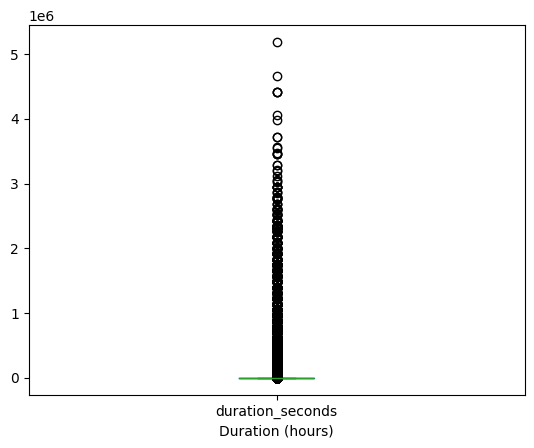

In [9]:
(waiting_time_event_log['duration_seconds']).plot.box(xlabel='Duration (hours)')

<Axes: >

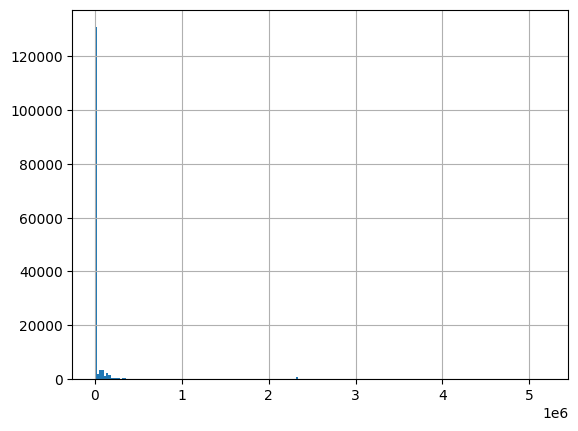

In [10]:
waiting_time_event_log['duration_seconds'].hist(bins=200)

In [11]:
waiting_time_event_log[waiting_time_event_log['duration_seconds']  < 1]

,Action_schedule,org:resource_schedule,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,case:RequestedAmount_schedule,FirstWithdrawalAmount_schedule,NumberOfTerms_schedule,Accepted_schedule,MonthlyCost_schedule,Selected_schedule,CreditScore_schedule,OfferedAmount_schedule,OfferID_schedule,Action_start,org:resource_start,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,duration,duration_seconds,duration_ms,duration_hours
1191520,Created,User_112,W_Validate application,Workflow,Workitem_100000116,schedule,2016-03-02 13:25:52.388000+00:00,Home improvement,Limit raise,Application_1650545424,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_112,Workflow,Workitem_685532007,start,2016-03-02 13:25:52.390000+00:00,Home improvement,Limit raise,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
3421227,Created,User_17,W_Call after offers,Workflow,Workitem_1000054994,schedule,2016-06-04 14:13:59.235000+00:00,Boat,New credit,Application_1057234686,42500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_17,Workflow,Workitem_285189578,start,2016-06-04 14:13:59.237000+00:00,Boat,New credit,42500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
570942,Created,User_29,W_Call incomplete files,Workflow,Workitem_1000077220,schedule,2016-02-15 14:20:21.643000+00:00,Home improvement,Limit raise,Application_1381149703,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_29,Workflow,Workitem_2057389867,start,2016-02-15 14:20:21.645000+00:00,Home improvement,Limit raise,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
5562837,Created,User_17,W_Complete application,Workflow,Workitem_1000080144,schedule,2016-08-24 17:23:57.391000+00:00,Home improvement,New credit,Application_1391166438,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_17,Workflow,Workitem_966885454,start,2016-08-24 17:23:57.394000+00:00,Home improvement,New credit,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.003000,0.003,3.0,8.333333e-07
5193910,Created,User_12,W_Call after offers,Workflow,Workitem_1000106868,schedule,2016-08-08 08:59:12.616000+00:00,"Other, see explanation",New credit,Application_1971575688,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_12,Workflow,Workitem_441981247,start,2016-08-08 08:59:12.618000+00:00,"Other, see explanation",New credit,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690462,Created,User_18,W_Call after offers,Workflow,Workitem_99993056,schedule,2016-08-31 12:50:12.322000+00:00,Home improvement,New credit,Application_331963116,28300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_18,Workflow,Workitem_1083632629,start,2016-08-31 12:50:12.324000+00:00,Home improvement,New credit,28300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
2618769,Created,User_4,W_Complete application,Workflow,Workitem_999936192,schedule,2016-04-28 17:34:53.020000+00:00,Car,New credit,Application_570083989,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_4,Workflow,Workitem_664254278,start,2016-04-28 17:34:53.025000+00:00,Car,New credit,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.005000,0.005,5.0,1.388889e-06
4390845,Created,User_116,W_Validate application,Workflow,Workitem_999950446,schedule,2016-07-15 12:55:25.889000+00:00,Existing loan takeover,New credit,Application_519919221,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_

In [12]:
waiting_time_event_log[waiting_time_event_log['case:concept:name'] == 'Application_1780975856'].sort_values('time:timestamp_start')

,Action_schedule,org:resource_schedule,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,case:RequestedAmount_schedule,FirstWithdrawalAmount_schedule,NumberOfTerms_schedule,Accepted_schedule,MonthlyCost_schedule,Selected_schedule,CreditScore_schedule,OfferedAmount_schedule,OfferID_schedule,Action_start,org:resource_start,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,duration,duration_seconds,duration_ms,duration_hours
7994541,Created,User_61,W_Complete application,Workflow,Workitem_959963197,schedule,2016-12-05 11:11:51.485000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_61,Workflow,Workitem_1283980221,start,2016-12-05 11:11:51.488000+00:00,Car,New credit,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.003000,0.003,3.000000e+00,8.333333e-07
7994558,Created,User_61,W_Call after offers,Workflow,Workitem_567378604,schedule,2016-12-05 11:18:52.405000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_61,Workflow,Workitem_209633872,start,2016-12-05 11:18:52.407000+00:00,Car,New credit,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.000000e+00,5.555556e-07
7994587,Created,User_1,W_Call after offers,Workflow,Workitem_1219842116,schedule,2016-12-09 06:33:43.307000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_871732675,withdraw,2017-01-21 07:00:13.899000+00:00,Car,New credit,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43 days 00:26:30.592000,3716790.592,3.716791e+09,1.032442e+03


In [13]:
event_log[event_log['case:concept:name'] == 'Application_1780975856'].sort_values('time:timestamp')

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
1124641,Created,User_61,A_Create Application,Application,Application_1780975856,complete,2016-12-05 11:11:51.476000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124642,Created,User_61,W_Complete application,Workflow,Workitem_959963197,schedule,2016-12-05 11:11:51.485000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124643,Obtained,User_61,W_Complete application,Workflow,Workitem_1283980221,start,2016-12-05 11:11:51.488000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124644,statechange,User_61,A_Concept,Application,ApplState_1085955349,complete,2016-12-05 11:11:51.490000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124645,statechange,User_61,A_Accepted,Application,ApplState_1010610808,complete,2016-12-05 11:16:46.539000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124646,Created,User_61,O_Create Offer,Offer,Offer_874707720,complete,2016-12-05 11:18:42.271000+00:00,Car,New credit,Application_1780975856,16000.0,16000.0,56.0,True,315.95,False,0.0,16000.0,NaN
1124647,statechange,User_61,O_Created,Offer,OfferState_1467052546,complete,2016-12-05 11:18:42.953000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_874707720
1124648,statechange,User_61,O_Sent (mail and online),Offer,OfferState_1959961222,complete,2016-12-05 11:18:52.329000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_874707720
1124649,Deleted,User_61,W_Complete application,Workflow,Workitem_925990201,complete,2016-12-05 11:18:52.399000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124650,Created,User_61,W_Call after offers,Workflow,Workitem_567378604,schedule,2016-12-05 11:18:52.405000+00:00,Car,New credit,Application_1780975856,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
waiting_time_event_log

,Action_schedule,org:resource_schedule,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,case:RequestedAmount_schedule,FirstWithdrawalAmount_schedule,NumberOfTerms_schedule,Accepted_schedule,MonthlyCost_schedule,Selected_schedule,CreditScore_schedule,OfferedAmount_schedule,OfferID_schedule,Action_start,org:resource_start,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,duration,duration_seconds,duration_ms,duration_hours
1191520,Created,User_112,W_Validate application,Workflow,Workitem_100000116,schedule,2016-03-02 13:25:52.388000+00:00,Home improvement,Limit raise,Application_1650545424,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_112,Workflow,Workitem_685532007,start,2016-03-02 13:25:52.390000+00:00,Home improvement,Limit raise,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
3421227,Created,User_17,W_Call after offers,Workflow,Workitem_1000054994,schedule,2016-06-04 14:13:59.235000+00:00,Boat,New credit,Application_1057234686,42500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_17,Workflow,Workitem_285189578,start,2016-06-04 14:13:59.237000+00:00,Boat,New credit,42500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
2141798,Created,User_1,W_Handle leads,Workflow,Workitem_1000067379,schedule,2016-04-08 08:24:18.889000+00:00,"Other, see explanation",New credit,Application_1784530182,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_146500396,withdraw,2016-04-08 08:25:50.845000+00:00,"Other, see explanation",New credit,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:31.956000,91.956,91956.0,2.554333e-02
570942,Created,User_29,W_Call incomplete files,Workflow,Workitem_1000077220,schedule,2016-02-15 14:20:21.643000+00:00,Home improvement,Limit raise,Application_1381149703,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_29,Workflow,Workitem_2057389867,start,2016-02-15 14:20:21.645000+00:00,Home improvement,Limit raise,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07
5562837,Created,User_17,W_Complete application,Workflow,Workitem_1000080144,schedule,2016-08-24 17:23:57.391000+00:00,Home improvement,New credit,Application_1391166438,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_17,Workflow,Workitem_966885454,start,2016-08-24 17:23:57.394000+00:00,Home improvement,New credit,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.003000,0.003,3.0,8.333333e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618769,Created,User_4,W_Complete application,Workflow,Workitem_999936192,schedule,2016-04-28 17:34:53.020000+00:00,Car,New credit,Application_570083989,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_4,Workflow,Workitem_664254278,start,2016-04-28 17:34:53.025000+00:00,Car,New credit,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.005000,0.005,5.0,1.388889e-06
7271087,Created,User_1,W_Complete application,Workflow,Workitem_999941498,schedule,2016-11-03 13:47:30.248000+00:00,Existing loan takeover,New credit,Application_353618899,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_79,Workflow,Workitem_1595899599,start,2016-11-04 16:09:38.634000+00:00,Existing loan takeover,New credit,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days 02:22:08.386000,94928.386,94928386.0,2.636900e+01
4390845,Created,User_116,W_Validate application,Workflow,Workitem_999950446,schedule,2016-07-15 12:55:25.889000+00:00,Existing loan takeover,New credit,Application_519919221,20000.0,NaN,NaN,NaN,NaN,NaN,

In [15]:
# Seconds in day
waiting_time_event_log = TransformEventLog.seconds_in_day(waiting_time_event_log, 'time:timestamp_schedule')
# day of week
start_end_event_log = TransformEventLog.day_of_week(waiting_time_event_log, 'time:timestamp_schedule')

In [16]:
waiting_time_event_log

,Action_schedule,org:resource_schedule,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,case:RequestedAmount_schedule,FirstWithdrawalAmount_schedule,NumberOfTerms_schedule,Accepted_schedule,MonthlyCost_schedule,Selected_schedule,CreditScore_schedule,OfferedAmount_schedule,OfferID_schedule,Action_start,org:resource_start,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day
1191520,Created,User_112,W_Validate application,Workflow,Workitem_100000116,schedule,2016-03-02 13:25:52.388000+00:00,Home improvement,Limit raise,Application_1650545424,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_112,Workflow,Workitem_685532007,start,2016-03-02 13:25:52.390000+00:00,Home improvement,Limit raise,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,48352
3421227,Created,User_17,W_Call after offers,Workflow,Workitem_1000054994,schedule,2016-06-04 14:13:59.235000+00:00,Boat,New credit,Application_1057234686,42500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_17,Workflow,Workitem_285189578,start,2016-06-04 14:13:59.237000+00:00,Boat,New credit,42500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,51239
2141798,Created,User_1,W_Handle leads,Workflow,Workitem_1000067379,schedule,2016-04-08 08:24:18.889000+00:00,"Other, see explanation",New credit,Application_1784530182,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_146500396,withdraw,2016-04-08 08:25:50.845000+00:00,"Other, see explanation",New credit,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:31.956000,91.956,91956.0,2.554333e-02,30258
570942,Created,User_29,W_Call incomplete files,Workflow,Workitem_1000077220,schedule,2016-02-15 14:20:21.643000+00:00,Home improvement,Limit raise,Application_1381149703,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_29,Workflow,Workitem_2057389867,start,2016-02-15 14:20:21.645000+00:00,Home improvement,Limit raise,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,51621
5562837,Created,User_17,W_Complete application,Workflow,Workitem_1000080144,schedule,2016-08-24 17:23:57.391000+00:00,Home improvement,New credit,Application_1391166438,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_17,Workflow,Workitem_966885454,start,2016-08-24 17:23:57.394000+00:00,Home improvement,New credit,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.003000,0.003,3.0,8.333333e-07,62637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618769,Created,User_4,W_Complete application,Workflow,Workitem_999936192,schedule,2016-04-28 17:34:53.020000+00:00,Car,New credit,Application_570083989,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_4,Workflow,Workitem_664254278,start,2016-04-28 17:34:53.025000+00:00,Car,New credit,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.005000,0.005,5.0,1.388889e-06,63293
7271087,Created,User_1,W_Complete application,Workflow,Workitem_999941498,schedule,2016-11-03 13:47:30.248000+00:00,Existing loan takeover,New credit,Application_353618899,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_79,Workflow,Workitem_1595899599,start,2016-11-04 16:09:38.634000+00:00,Existing loan takeover,New credit,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days 02:22:08.386000,94928.386,94928386.0,2.636900e+01,49650
4390845,Created,User_116,W_Validate application,Workflow,Workitem_999950446,schedule,2016-07-15 12:55:25.889000+00:00,Existing loan takeover,

In [17]:
# Resource counts

resource_count_event_log = TransformEventLog.value_count_per_case(waiting_time_event_log, 'org:resource_schedule',
                                                                  timestamp_name = 'time:timestamp_schedule',
                                                                 lifecycle_col_name = 'lifecycle:transition_schedule' )

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:137: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value_count_event_log = value_count_event_log.fillna(0)


In [18]:
resource_count_event_log

,Action_schedule,org:resource_schedule,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,case:RequestedAmount_schedule,FirstWithdrawalAmount_schedule,NumberOfTerms_schedule,Accepted_schedule,MonthlyCost_schedule,Selected_schedule,CreditScore_schedule,OfferedAmount_schedule,OfferID_schedule,Action_start,org:resource_start,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,User_1,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,...,User_54,User_55,User_56,User_57,User_58,User_59,User_6,User_60,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99
0,Created,User_112,W_Validate application,Workflow,Workitem_100000116,schedule,2016-03-02 13:25:52.388000+00:00,Home improvement,Limit raise,Application_1650545424,40000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_112,Workflow,Workitem_685532007,start,2016-03-02 13:25:52.390000+00:00,Home improvement,Limit raise,40000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,48352,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Created,User_17,W_Call after offers,Workflow,Workitem_1000054994,schedule,2016-06-04 14:13:59.235000+00:00,Boat,New credit,Application_1057234686,42500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_17,Workflow,Workitem_285189578,start,2016-06-04 14:13:59.237000+00:00,Boat,New credit,42500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,51239,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Created,User_1,W_Handle leads,Workflow,Workitem_1000067379,schedule,2016-04-08 08:24:18.889000+00:00,"Other, see explanation",New credit,Application_1784530182,75000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_1,Workflow,Workitem_146500396,withdraw,2016-04-08 08:25:50.845000+00:00,"Other, see explanation",New credit,75000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:01:31.956000,91.956,91956.0,2.554333e-02,30258,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Created,User_29,W_Call incomplete files,Workflow,Workitem_1000077220,schedule,2016-02-15 14:20:21.643000+00:00,Home improvement,Limit raise,Application_1381149703,50000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_29,Workflow,Workitem_2057389867,start,2016-02-15 14:20:21.645000+00:00,Home improvement,Limit raise,50000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,51621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Created,User_17,W_Complete application,Workflow,Workitem_1000080144,schedule,2016-08-24 17:23:57.391000+00:00,Home improvement,New credit,Application_1391166438,10000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_17,Workflow,Workitem_966885454,start,2016-08-24 17:23:57.394000+00:00,Home improvement,New credit,10000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.003000,0.003,3.0,8.333333e-07,62637,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [19]:
activity_count_event_log = TransformEventLog.value_count_per_case(resource_count_event_log, 'concept:name',
                                                                  timestamp_name = 'time:timestamp_schedule',
                                                                 lifecycle_col_name = 'lifecycle:transition_schedule' )

In [20]:
activity_count_event_log

,Action_schedule,org:resource_schedule,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,case:RequestedAmount_schedule,FirstWithdrawalAmount_schedule,NumberOfTerms_schedule,Accepted_schedule,MonthlyCost_schedule,Selected_schedule,CreditScore_schedule,OfferedAmount_schedule,OfferID_schedule,Action_start,org:resource_start,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,User_1,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,...,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99,W_Assess potential fraud,W_Call after offers,W_Call incomplete files,W_Complete application,W_Handle leads,W_Personal Loan collection,W_Shortened completion,W_Validate application
0,Created,User_112,W_Validate application,Workflow,Workitem_100000116,schedule,2016-03-02 13:25:52.388000+00:00,Home improvement,Limit raise,Application_1650545424,40000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_112,Workflow,Workitem_685532007,start,2016-03-02 13:25:52.390000+00:00,Home improvement,Limit raise,40000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,48352,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,Created,User_17,W_Call after offers,Workflow,Workitem_1000054994,schedule,2016-06-04 14:13:59.235000+00:00,Boat,New credit,Application_1057234686,42500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_17,Workflow,Workitem_285189578,start,2016-06-04 14:13:59.237000+00:00,Boat,New credit,42500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,51239,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
2,Created,User_1,W_Handle leads,Workflow,Workitem_1000067379,schedule,2016-04-08 08:24:18.889000+00:00,"Other, see explanation",New credit,Application_1784530182,75000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_1,Workflow,Workitem_146500396,withdraw,2016-04-08 08:25:50.845000+00:00,"Other, see explanation",New credit,75000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:01:31.956000,91.956,91956.0,2.554333e-02,30258,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Created,User_29,W_Call incomplete files,Workflow,Workitem_1000077220,schedule,2016-02-15 14:20:21.643000+00:00,Home improvement,Limit raise,Application_1381149703,50000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_29,Workflow,Workitem_2057389867,start,2016-02-15 14:20:21.645000+00:00,Home improvement,Limit raise,50000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.002000,0.002,2.0,5.555556e-07,51621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
4,Created,User_17,W_Complete application,Workflow,Workitem_1000080144,schedule,2016-08-24 17:23:57.391000+00:00,Home improvement,New credit,Application_1391166438,10000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_17,Workflow,Workitem_966885454,start,2016-08-24 17:23:57.394000+00:00,Home improvement,New credit,10000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:00:00.003000,0.003,3.0,8.333333e-07,62637,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,

In [21]:
activity_count_event_log.to_csv('../transformed_event_logs/BPIC_2017_waiting_time.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
activity_count_event_log.to_pickle('../transformed_event_logs/BPIC_2017_waiting_time.pickle')